In [165]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [166]:
df = pd.read_csv("/Volumes/sambashare/models/isef/lenet_patches_monochrome_no_bn/log.csv").head(606)

In [167]:
filter1 = np.array([1] * 10)
filter1 = filter1 / float(filter1.sum())

filter1_ = np.array([0] * 2 + [1] * 6 + [0] * 2)
filter1_ = filter1_ / float(filter1_.sum())

filter2 = np.array([1] * 10)
filter2 = filter2 / float(filter2.sum())

filter2_ = np.array([0] * 2 + [1] * 6 + [0] * 2)
filter2_ = filter2_ / float(filter2_.sum())

frame = pd.DataFrame.from_dict({"Training Accuracy": np.convolve(df.acc, filter1, "valid"),
                                "Validation Accuracy": np.convolve(df.val_acc, filter1_, "valid")})
frame2 = pd.DataFrame.from_dict({"Training Loss": np.convolve(df.loss, filter2, "valid"),
                                "Validation Loss": np.convolve(df.val_loss, filter2_, "valid")})

sns.set()
sns.set_style("dark")
sns.set_context("talk")

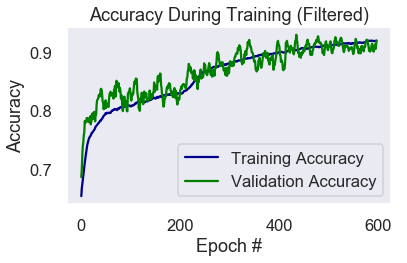

In [168]:
sns.lineplot(data=frame, dashes=False, palette={"Training Accuracy": "darkblue", "Validation Accuracy": "green"}, legend="full")
plt.title("Accuracy During Training (Filtered)")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("/Volumes/sambashare/vis/lemono_acc.png", dpi=400)

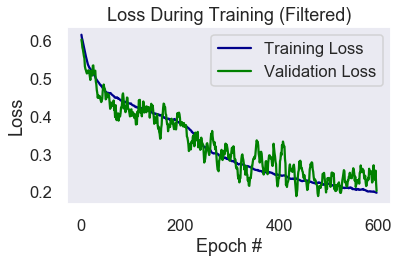

In [169]:
sns.lineplot(data=frame2, dashes=False, palette={"Training Loss": "darkblue", "Validation Loss": "green"}, legend="full")
plt.title("Loss During Training (Filtered)")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.tight_layout()
plt.savefig("/Volumes/sambashare/vis/lemono_loss.png", dpi=400)